<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Week-3-Item-5-Checkpoint" data-toc-modified-id="Week-3-Item-5-Checkpoint-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Week 3 Item 5 Checkpoint</a></span><ul class="toc-item"><li><span><a href="#Getting-Started" data-toc-modified-id="Getting-Started-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Getting Started</a></span></li><li><span><a href="#Linear-Model" data-toc-modified-id="Linear-Model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Linear Model</a></span></li><li><span><a href="#Cubic-Polynomial-1" data-toc-modified-id="Cubic-Polynomial-1-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Cubic Polynomial 1</a></span></li><li><span><a href="#Cubic-Polynomial-2" data-toc-modified-id="Cubic-Polynomial-2-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Cubic Polynomial 2</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

# Week 3 Item 5 Checkpoint

Earlier this week, we used "bolt_data.csv" to build a simple linear model of the form: $y = mx + b$

There are two criticisms one might make of this model:
1. It predicts that Mr. Bolt will start at time = 0 at a position not equal to 0.
2. It assumes that Mr. Bolt runs at a consistent speed (represented by slope).

Try the following types of models for the Usain Bolt data (you can fit all the data -- you do not need to test/train split).
- A linear model of the form: $y = mx$, with the y-intercept forced to be 0.
(Try basic [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) but with: `fit_intercept = False`)
- A cubic polynomial (you can use a model similar to the one we built in class on Thursday, but with a degree = 3 instead of degree = 2)
- A cubic polynomial of the form: $y = ax^3 + bx^2 + cx$, with the y-intercept forced to be 0. (When you built the Pipeline object and put in the LinearRegression step, use the `fit_intercept=False` option.)

Answer the following question: 
> Of the models you have created, which one do you think is the best?
>Take into account all of the measures that we discussed in terms of assessing models.

Attach a Jupyter Notebook showing your work.

* * *

## Getting Started

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [2]:
# Loading data
bolt = pd.read_csv('bolt_data.csv')
bolt.head()

,time,position
0,0.00,0
1,1.85,10
2,2.87,20
3,3.78,30
4,4.65,40


***

## Linear Model

$y = mx$

In [3]:
# Split time data from bolt
bt = bolt["time"].values.reshape(-1, 1)

In [4]:
# Split position data from bolt
bp = bolt["position"]

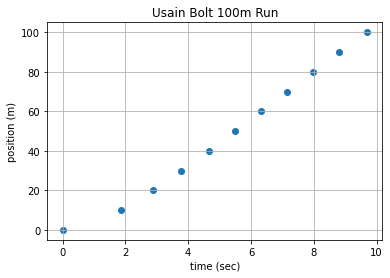

In [5]:
# Plot
plt.scatter(bt, bp)
plt.xlabel("time (sec)")
plt.ylabel("position (m)")
plt.title("Usain Bolt 100m Run")
plt.grid(True)

In [6]:
# Correlation
bolt["time"].corr(bolt["position"])

0.9948264249754971

In [7]:
# Create classifier object and fit data
lm = LinearRegression(fit_intercept=False).fit(bt, bp)

In [8]:
# Get coefficient
lm.coef_

array([9.73605139])

In [9]:
# Get intercept
lm.intercept_

0.0

In [10]:
pos_pred = lm.predict(bt)

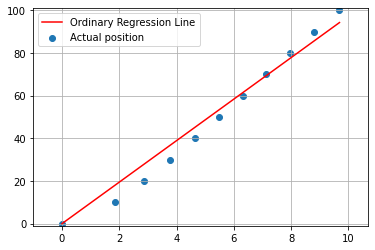

In [11]:
# Create scatter plot
plt.scatter(bolt["time"], bolt["position"], label="Actual position")

# Create line plot
plt.plot(bolt["time"], pos_pred, color="red", label="Ordinary Regression Line")

# Edit axes
plt.xlim(bolt["time"].min() - 1, bolt["time"].max() + 1)  # change x-axis
plt.ylim(bolt["position"].min() - 1,
         bolt["position"].max() + 1)  # change y-axis

# Print labels
plt.grid(True)
plt.legend()
plt.show()

In [12]:
pos_residuals = bp - pos_pred
pos_residuals

0     0.000000
1    -8.011695
2    -7.942467
3    -6.802274
4    -5.272639
5    -3.548283
6    -1.531845
7     0.484593
8     2.501031
9     4.420108
10    5.657662
Name: position, dtype: float64

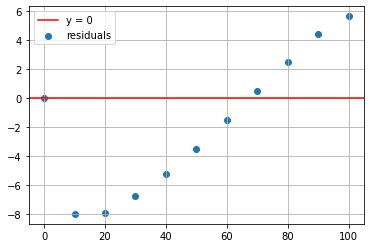

In [13]:
plt.scatter(bp, pos_residuals, label="residuals")
plt.axhline(y=0, color='red', label="y = 0")
plt.legend()
plt.grid(True)
plt.show()

***

## Cubic Polynomial 1

$y = ax^3 + bx^2 + cx + d$

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

In [15]:
cub_fit = PolynomialFeatures(degree=3, include_bias=False)

In [16]:
cm = LinearRegression()

In [17]:
cub_reg = make_pipeline(cub_fit, cm)

In [18]:
cub_reg.fit(bt, bp)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [19]:
cm.coef_

array([ 3.75096592,  1.3654344 , -0.07087901])

In [20]:
cm.intercept_

-0.30097506310944766

In [21]:
cub_reg.score(bt, bp)

0.9998621069077964

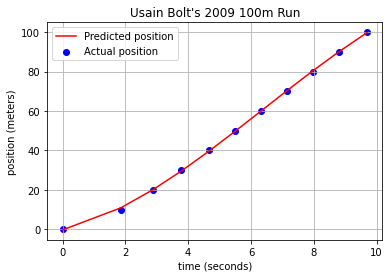

In [22]:
plt.scatter(bt, bp, color="blue", label='Actual position')
plt.plot(bt, cub_reg.predict(bt), color="red", label='Predicted position')
plt.xlabel("time (seconds)")
plt.ylabel("position (meters)")
plt.title("Usain Bolt's 2009 100m Run")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
bp_pred = cub_reg.predict(bt)

In [24]:
bp_cub_residuals = bp - bp_pred

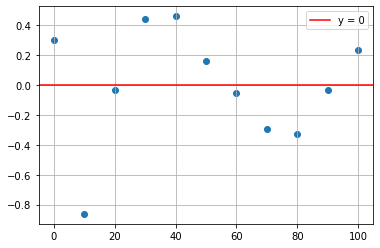

In [25]:
plt.scatter(bp, bp_cub_residuals)
plt.axhline(y=0, color='red', label='y = 0')
plt.legend()
plt.grid(True)

***

## Cubic Polynomial 2

$y = ax^3 + bx^2 + cx$

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

In [27]:
poly_fit = PolynomialFeatures(degree=3, include_bias=False)

In [28]:
cm = LinearRegression(fit_intercept=False)

In [29]:
cub_reg = make_pipeline(poly_fit, cm)

In [30]:
cub_reg.fit(bt, bp)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [31]:
cm.coef_

array([ 3.56296819,  1.39941833, -0.07273712])

In [32]:
cm.intercept_

0.0

In [33]:
cub_reg.score(bt, bp)

0.99985332777976

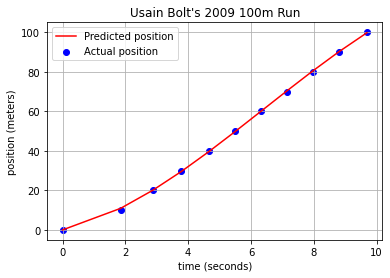

In [34]:
plt.scatter(bt, bp, color="blue", label='Actual position')
plt.plot(bt, cub_reg.predict(bt), color="red", label='Predicted position')
plt.xlabel("time (seconds)")
plt.ylabel("position (meters)")
plt.title("Usain Bolt's 2009 100m Run")
plt.legend()
plt.grid(True)
plt.show()

In [35]:
bp_pred = cub_reg.predict(bt)

In [36]:
bp_cub_residuals = bp - bp_pred

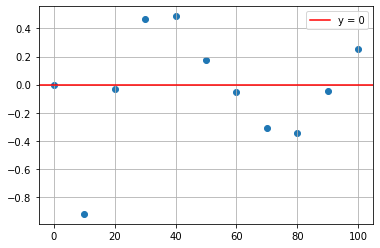

In [37]:
plt.scatter(bp, bp_cub_residuals)
plt.axhline(y=0, color='red', label='y = 0')
plt.legend()
plt.grid(True)

* * *

## Summary

From the work accomplished in this notebook, the [1st cubic regression](#Cubic-Polynomial-1) has the barely the highest $R^2$ value at 0.99986 so we could assume this would be the best model.  However, the y-intercept is -0.3 which does not make rational sense.  

The [2nd cubic regression](#Cubic-Polynomial-2) is more accurate because it starts (y-intercept) at 0, even though the $R^2$ value is -.00001 different.

However, when looking at the residuals of each regression, there is a clear pattern of data.  This means we are failing to capture some aspect of our data.

Question:
> Of the models you have created, which one do you think is the best? Take into account all of the measures that we discussed in terms of assessing models.

Answer:
> The 2nd cubic regression where the y-intercept is set to 0.
